# Year by year, 2020 sentiment analysis

This notebook compare the sentiments of all the quotes from Foxnews and the Ny times for the year 2020. Then some graphics are added to sum up all the years. Some of the notable discorevies on this notebook are:
    - The 2020 year does not appear to be the best to differenciate the two journals
    - Graphics shows differences between the two journals

# Table of contents
1. [NLTK](#n)
2. [Text2emotion](#t)
3. [Graphics](#gr)

In [2]:
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import bz2
import json
from urllib.parse import urlparse
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import os
import glob
import pickle

In [2]:
# Importing the data
def read_yearly(y):
    PATH = 'Fox_NY_' + str(y) + '/'
    nb = 1
    df2 = []
    dirs = glob.glob(os.path.join(PATH, "*.pkl"))

    for files in dirs:
        df1 = pd.read_pickle(PATH + str(nb)+ '_' + str(y) + '_' + 'FoxNYtimes.pkl')
        df2.append(df1)
        nb += 1
    return df2

In [3]:
years = [2020]
df_foxNy3 = pd.DataFrame()

for y in years:
    df_foxNy3 = df_foxNy3.append(pd.concat(read_yearly(y)))

In [4]:
sia = SentimentIntensityAnalyzer()
from collections import namedtuple
import text2emotion as te
df_fox3 = df_foxNy3[df_foxNy3['urls'].str.contains('foxnews')]
df_ny3 = df_foxNy3[df_foxNy3['urls'].str.contains('nytimes')]

[nltk_data] Downloading package stopwords to C:\Users\François
[nltk_data]     CHARROIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\François
[nltk_data]     CHARROIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\François
[nltk_data]     CHARROIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
#function for the text2emotion analysis
def fon_text2 (df):
    Desc = namedtuple("Desc", ["fear", "happy", "angry","surprise","sad","length"])
    df_quotes = df['quotation']
    dfsize = len(df_quotes)
    fear = 0
    happy = 0
    angry = 0
    surprise = 0
    sad = 0
    average_fear = 0
    average_happy = 0
    average_angry = 0
    average_surprise = 0
    average_sad = 0

    for quotation in df_quotes:
        di = te.get_emotion(quotation)
        fear += di.get('Fear')
        happy += di.get('Happy')
        angry += di.get('Angry')
        surprise += di.get('Surprise')
        sad += di.get('Sad')
    average_fear = fear/dfsize
    average_happy = happy/dfsize
    average_angry = angry/dfsize
    average_surprise = surprise/dfsize
    average_sad = sad/dfsize

    print("fear{}, happy{}, angry{}, surprise{}, sad{}".format(average_fear, average_happy,
                                                               average_angry, average_surprise, average_sad))
    return (Desc(fear, happy, angry, surprise, sad, dfsize,))

In [6]:
#function for the nltk sentiment analysis
def fon_nltk (df):
    Desc = namedtuple("Desc", ["pos", "neg", "tot"])
    quotes = df['quotation']
    length= len(df)
    pos = 0
    neg = 0
    average_pos = 0
    average_neg = 0
    for quotation in quotes:
        result = sia.polarity_scores(quotation)
        pos += result["pos"]
        neg += result["neg"]
    average_pos = pos/length
    average_neg = neg/length
    print('Mean of positif and negatif feelings found respectively are:', average_pos,average_neg)
    return (Desc(pos, neg, length,))

## NLTK<a name="n"></a>

In [7]:
#Nltk analysis for the NY times
pos = 0
neg = 0
length = 0
pos, neg, length = fon_nltk(df_ny3)
print(pos, neg, length)

Mean of positif and negatif feelings found respectively are: 0.10547141987123755 0.07730176613885521
4849.154000000018 3554.0260000000076 45976


In [8]:
#Nltk analysis for Foxnews
pos = 0
neg = 0
length = 0
pos, neg, length = fon_nltk(df_fox3)
print(pos, neg, length)

Mean of positif and negatif feelings found respectively are: 0.11349214548268631 0.07977823563551907
5866.409000000055 4123.736999999981 51690


## Text2emotion<a name="t"></a>

In [9]:
#Text2emotion analysis for the NY times
fear = 0
happy = 0
angry = 0
surprise = 0
sad = 0
tot = 0

fear, happy, angry, surprise, sad, tot = fon_text2(df_ny3)
print(fear, happy, angry, surprise, sad, tot)

fear0.3368202975465449, happy0.09344636331998993, angry0.046844658082477536, surprise0.17906385940490221, sad0.19569558030276257
15485.649999999949 4296.289999999857 2153.7299999999873 8232.639999999785 8997.299999999812 45976


In [10]:
#Text2emotion analysis for Foxnews
fear = 0
happy = 0
angry = 0
surprise = 0
sad = 0
tot = 0

fear, happy, angry, surprise, sad, tot = fon_text2(df_fox3)
print(fear, happy, angry, surprise, sad, tot)

fear0.3480504933256054, happy0.1047626233313944, angry0.04698432965757303, surprise0.20168833430063893, sad0.20202360224414842
17990.73000000054 5415.179999999777 2428.61999999995 10425.270000000026 10442.600000000031 51690


## Graphics<a name="gr"></a>


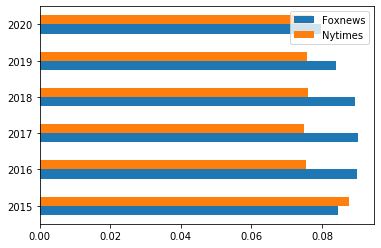

In [4]:
#negative nltk accross the years graphics
Foxnews = [0.08460186549682747, 0.08982915883001527, 0.09031551686457373, 0.08932449686837941,
        0.08390509712436937, 0.07977823563551907]
Nytimes = [0.08762264150943382, 0.07555322827908305, 0.07493777566340601, 0.07592907038524226, 
        0.07564601349876199, 0.07730176613885521]
index = ['2015', '2016', '2017',
         '2018', '2019', '2020']
df = pd.DataFrame({'Foxnews': Foxnews,
                   'Nytimes': Nytimes}, index = index)
ax = df.plot.barh()

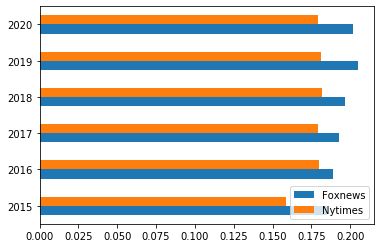

In [5]:
#surprise text2emotion accross the years graphics
Foxnews = [0.18508028450959127, 0.18898839094623937, 0.19248306257744463, 0.1968291770286956,
        0.20523727184277946, 0.20168833430063893]
Nytimes = [0.1587412768157147, 0.18007510665863127, 0.1790039832606699, 0.18190038410957854, 
        0.18110776226236425, 0.17906385940490221]
index = ['2015', '2016', '2017',
         '2018', '2019', '2020']
df = pd.DataFrame({'Foxnews': Foxnews,
                   'Nytimes': Nytimes}, index = index)
ax = df.plot.barh()

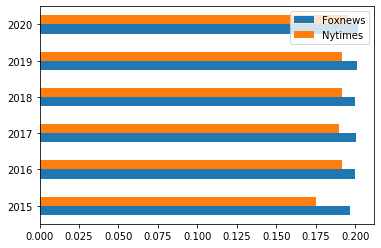

In [6]:
#sadness text2emotion accross the years graphics
Foxnews = [0.19682661101413393, 0.19974343342629722, 0.2006994973410505, 0.200047492401268,
        0.200828927470367, 0.20202360224414842]
Nytimes = [0.17536831222538113, 0.1919055343625344, 0.1896396923052509, 0.1915144019301704, 
        0.19134793009506534, 0.1956955803027625]
index = ['2015', '2016', '2017',
         '2018', '2019', '2020']
df = pd.DataFrame({'Foxnews': Foxnews,
                   'Nytimes': Nytimes}, index = index)
ax = df.plot.barh()